### Kaggle Competition
Predict Future Sales<br>
https://www.kaggle.com/c/competitive-data-science-predict-future-sales

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import datetime

In [2]:
import os
os.path.abspath('data/sales_train.csv')

'/home/jovyan/datacourse/extra_notebooks/data/sales_train.csv'

In [3]:
sales = pd.read_csv('/home/jovyan/datacourse/extra_notebooks/data/predict_future_sales/sales_train.csv', error_bad_lines=False)

In [4]:

sales['item_cnt_day'] = sales['item_cnt_day'].astype(np.int64)
sales.date = sales.date.apply(lambda x: datetime.datetime.strptime(x, '%d.%m.%Y'))

In [5]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1
1,2013-01-03,0,25,2552,899.00,1
2,2013-01-05,0,25,2552,899.00,-1
3,2013-01-06,0,25,2554,1709.05,1
4,2013-01-15,0,25,2555,1099.00,1


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      int64
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 134.4 MB


In [7]:
sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [9]:
items = pd.read_csv('/home/jovyan/datacourse/extra_notebooks/data/predict_future_sales/items.csv')

In [10]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [12]:
###  Probably not very useful for our purposes, but see later 
###  where we do use it to explore a little bit about certain products
item_categories = pd.read_csv('/home/jovyan/datacourse/extra_notebooks/data/predict_future_sales/item_categories.csv')
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [ ]:
###  Shops, i.e. shop_name and shop_id  
###  Probably not much use for prediction/analysis
#shops = pd.read_csv('/home/jovyan/datacourse/extra_notebooks/data/predict_future_sales/shops.csv')

#shops.head()

In [13]:
#  Aggregate based on unique month, shop, and item 
monthly_sales = sales.groupby(['date_block_num', 'shop_id', 'item_id']).agg({'date': ['min','max'], 'item_price': 'mean', 'item_cnt_day': 'sum'})

In [14]:
monthly_sales.head(20)

date            item_price item_cnt_day
                                      min        max       mean          sum
date_block_num shop_id item_id                                              
0              0       32      2013-01-03 2013-01-31      221.0            6
                       33      2013-01-03 2013-01-28      347.0            3
                       35      2013-01-31 2013-01-31      247.0            1
                       43      2013-01-31 2013-01-31      221.0            1
                       51      2013-01-13 2013-01-31      128.5            2
                       61      2013-01-10 2013-01-10      195.0            1
                       75      2013-01-17 2013-01-17       76.0            1
                       88      2013-01-16 2013-01-16       76.0            1
                       95      2013-01-06 2013-01-06      193.0            1
                       96      2013-01-10 2013-01-10       70.0            1
                       98      2013-01-04 2013-01-31      268.0           25
                       111     2013-01-17 2013-01-17       89.0            1
                       149     2013-01-11 2013-01-28       99.0            3
                       151     2013-01-16 2013-01-16       75.0            1
                       153     2013-01-09 2013-01-09      258.0            1
                       198     2013-01-10 2013-01-10      112.0            1
                       210     2013-01-05 2013-01-25      118.0            2
                       282     2013-01-04 2013-01-04      109.0            1
                       306     2013-01-22 2013-01-22       59.0            1
                       351     2013-01-21 2013-01-21       89.0            1

In [15]:
len(monthly_sales)

1609124

In [ ]:
monthly_sales.info()

In [16]:
##  Aggregate by month and shop_id, count total items sold
shop_monthly_sales = sales.groupby(['date_block_num', 'shop_id']).agg({'date': ['min','max'], 'item_price': 'mean', 'item_cnt_day': 'sum'})

In [ ]:
shop_monthly_sales.head()

In [ ]:
items.head()

In [17]:
items_per_category = items[['item_id', 'item_category_id']].groupby('item_category_id').count().sort_values(by='item_id',ascending=False)

items_per_category.head(10)

,item_id
item_category_id,
40,5035
55,2365
37,1780
31,1125
58,790
30,756
72,666
19,628
61,598


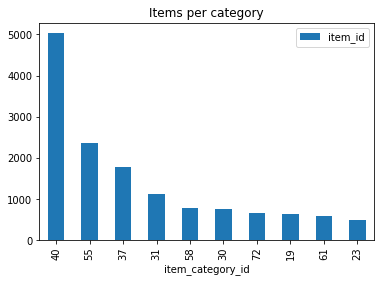

In [18]:
largest_categories = items_per_category.head(10).reset_index()
largest_categories.plot.bar(x='item_category_id', y='item_id', title='Items per category');

In [ ]:
#  The largest category is 40.  What's in this category? 

item_categories.loc[40]

In [19]:
#  Find mean price of items sold in category 40
merged = sales.merge(items, on='item_id')

merged.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,2013-01-02,0,59,22154,999.0,1,ЯВЛЕНИЕ 2012 (BD),37
1,2013-01-23,0,24,22154,999.0,1,ЯВЛЕНИЕ 2012 (BD),37
2,2013-01-20,0,27,22154,999.0,1,ЯВЛЕНИЕ 2012 (BD),37
3,2013-01-02,0,25,22154,999.0,1,ЯВЛЕНИЕ 2012 (BD),37
4,2013-01-03,0,25,22154,999.0,1,ЯВЛЕНИЕ 2012 (BD),37


In [20]:
merged.groupby('item_category_id').agg({'item_price': 'mean'}).iloc[40]

item_price    256.33915
Name: 40, dtype: float64

In [21]:
merged.groupby('item_category_id').agg({'item_price': 'mean'}).sort_values(by='item_price')[:15]

,item_price
item_category_id,
71,4.931371
50,20.500000
82,32.481014
66,76.778940
0,87.800000
52,100.000000
83,100.280925
51,129.000000
44,149.516129


In [22]:
#  Is the largest category one of the most popular over all sales? 

merged.groupby('item_category_id').agg({'item_cnt_day': 'sum'}).sort_values(by='item_cnt_day', ascending=False)[:10]

,item_cnt_day
item_category_id,
40,634171
30,456540
55,348591
19,254887
37,203284
71,187998
28,174954
23,169944
20,127319


### Month/Shop item counts
We can group by month and shop_id in order to find the total number of items sold in each shop for each month.  

In [23]:
store_item_sales = sales.groupby(['date_block_num', 'shop_id'])['item_cnt_day'].sum()

In [ ]:
store_item_sales.head()

####  How do we index into this multi-indexed DataFrame?

In [24]:
store_item_sales.index

MultiIndex([( 0,  0),
            ( 0,  1),
            ( 0,  2),
            ( 0,  3),
            ( 0,  4),
            ( 0,  6),
            ( 0,  7),
            ( 0,  8),
            ( 0, 10),
            ( 0, 12),
            ...
            (33, 48),
            (33, 49),
            (33, 50),
            (33, 52),
            (33, 53),
            (33, 55),
            (33, 56),
            (33, 57),
            (33, 58),
            (33, 59)],
           names=['date_block_num', 'shop_id'], length=1586)

We can use `loc` together with a tuple to get a particular element from this multi-indexed DataFrame.

In [25]:
store_item_sales.loc[(0,0)]  #  Month = 0, store_id = 0

5578

In [26]:
store_item_sales.loc[(1,0)]  #  Month = 1, store_id = 0

6127

Suppose I want all of the sales for `shop_id = 0`?  How do I get that?  

We can use `loc` together with the `slice(None)` output to get everything for a particular shop.  The `slice` method is used to create a "slice object" for "extended slicing".  Using `None` as the argument actually tells `pandas` to give us everything for that particular value of the index in this case.  

In [27]:
store_item_sales.loc[(slice(None), 0)]

date_block_num
0    5578
1    6127
Name: item_cnt_day, dtype: int64

Note there are only two rows for `shop_id = 0` in this DataFrame.  Maybe that particular store closed after those two months into the time period covered by this data set?

In [28]:
store_item_sales.loc[(slice(None), 2)]

date_block_num
0     1146
1      488
2      753
3      583
4      553
5      832
6      807
7      875
8      945
9      795
10     862
11    1322
12     890
13     911
14     990
15     791
16     910
17     957
18     838
19     956
20     920
21     945
22    1192
23    1921
24     987
25     907
26     762
27     859
28     843
29     804
30     785
31     942
32     822
33     727
Name: item_cnt_day, dtype: int64

###  Total sales by month across all stores

Let's aggregate total items sold by month across all stores, and see if we can build a predictive model for that data.  Note that this data has been stored as a DataFrame for the modeling that will be done later (using the custom transformers we will build for those purposes). 

We could do the same for total revenue in a similar fashion, by first computing revenue for each individual sale, and then aggregating my month.

In [29]:
total_item_sales = sales.groupby(['date_block_num'])[['item_cnt_day']].sum()

In [34]:
total_item_sales.head()

,item_cnt_day
date_block_num,
0,131479
1,128090
2,147142
3,107190
4,106970


In [30]:
len(total_item_sales)

34

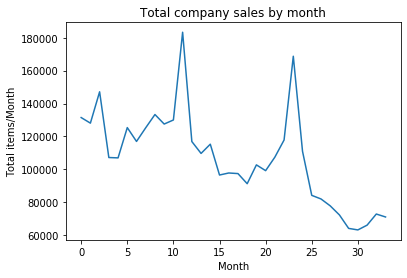

In [31]:
plt.plot(total_item_sales)
plt.xlabel('Month')
plt.ylabel('Total items/Month')
plt.title('Total company sales by month');

There appears to be a general decreasing trend, just by "eyeballing" the data, and some kind of seasonal behavior on possibly a yearly cycle (12 months).  

With only 33 months of data, it's likely difficult to do any reliable Fourier decomposition to search for any other periodic behavior.  

In [32]:
from scipy import fftpack # fast Fourier transforms

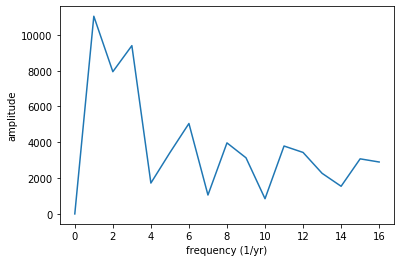

In [33]:
Y = fftpack.fft(total_item_sales['item_cnt_day']-total_item_sales['item_cnt_day'].mean())
plt.plot(np.abs(Y[:len(Y)//2])/len(Y)) # FT
plt.xlabel('frequency (1/yr)')
plt.ylabel('amplitude');

The largest spike is at 1/yr with the next largest at what looks like 3/yr, with smaller ones at 6/yr, etc.  

Let's try some modeling similar to what was done in the notebook on Time Series, i.e. engineering some features for a trend, seasonal components, etc.   

Keep in mind that we only have 33 months of data, so it's not the largest data set to work with here. 

In [35]:
##  Custom transformers, similar to what we did before in TS notebook

from sklearn.base import BaseEstimator, TransformerMixin

class IndexSelector(BaseEstimator, TransformerMixin):
    def __init__(self):
        """Return indices of a data frame for use in other estimators."""
        pass
    
    def fit(self, df, y=None):
        return self
    
    def transform(self, df):
        indices = df.index
        return indices.values.reshape(-1, 1)
    
class FourierComponents(BaseEstimator, TransformerMixin):
    def __init__(self, freqs):
        """Create features based on sin(2*pi/f*t) and cos(2*pi/f*t)."""
        self.freqs = freqs
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        Xt = np.zeros((X.shape[0], 2*len(self.freqs)))
        
        for i, f in enumerate(self.freqs):

            Xt[:, 2*i]= np.cos(2*np.pi/f*X).reshape(-1)
            Xt[:, 2*i + 1] = np.sin(2*np.pi/f*X).reshape(-1)
    
        return Xt

In [36]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler

In [37]:
#  Trend, let's take a quadratic function.  While it looks linear
#  in nature, the regression should choose a small coefficient for
#  the quadratic term if it is indeed a linear trend.  
poly = Pipeline([
    ('indices', IndexSelector()),  # extract index from df, input into transformer
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

#  Seasonal components, KEEP IN MIND that the spike at 1/yr means we want
#  the frequency to be 12, i.e. every twelve months.  The spike at 3/yr
#  means we want a frequency to be 4, i.e. every four months, etc.
fourier = Pipeline([
    ('indices', IndexSelector()),
    ('fourier', FourierComponents([4,12])) # 2 highest frequencies here to construct Sin/Cosine linear superposition
])

features = FeatureUnion([
    ('trend', poly),       # drift
    ('seasonal', fourier)  # seasonality
])

model = Pipeline([
    ('features', features),
    ('scale', StandardScaler()),
    ('estimator', LinearRegression())
])

###  Train/test split, for the purposes of testing

Since this is a time series, we can't just randomly split the data. 

In [38]:
cutoff = 30  #  Value is rather arbitrary, and we have a small data set.

X_train = total_item_sales[:cutoff]
y_train = total_item_sales[:cutoff]['item_cnt_day'].values.reshape(-1,1)

X_test = total_item_sales[cutoff:]
y_test = total_item_sales[cutoff:]['item_cnt_day'].values.reshape(-1,1)

#  The full set of data, for later use
X_full = total_item_sales
y_full = total_item_sales['item_cnt_day'].values.reshape(-1,1)

###  Fit the model

In [39]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('features',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('trend',
                                                 Pipeline(memory=None,
                                                          steps=[('indices',
                                                                  IndexSelector()),
                                                                 ('poly',
                                                                  PolynomialFeatures(degree=2,
                                                                                     include_bias=False,
                                                                                     interaction_only=False,
                                                                                     order='C'))],
                                                          verbose=False)),
                                                ('seasonal'

In [40]:
model.score(X_train, y_train)

0.7127077295583759

In [41]:
model.score(X_full, y_full)

0.7568644002013724

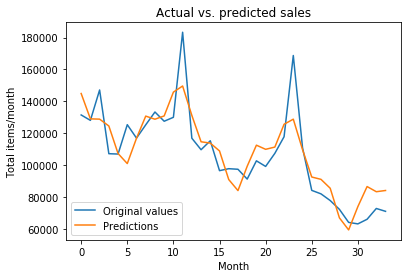

In [42]:
plt.plot(total_item_sales, label='Original values')
plt.plot(np.vstack([model.predict(X_train), model.predict(X_test)]), label='Predictions')
plt.xlabel('Month')
plt.ylabel('Total items/month')
plt.title('Actual vs. predicted sales')
plt.legend();

In [43]:
model.named_steps['estimator'].coef_

array([[ -7123.43458307,  -6955.83994772,  -2010.67620904,
         -5994.86468534,   9825.90100315, -10490.43475572]])

In [44]:
#  Retrain on the full set of data if we are going to examine the 
#  residuals too.  
model.fit(X_full, y_full)
residuals = X_full - model.predict(X_full)

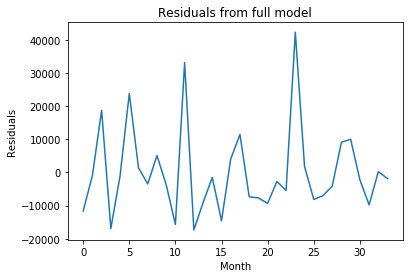

In [45]:
plt.plot(residuals)
plt.title('Residuals from full model')
plt.xlabel('Month')
plt.ylabel('Residuals');

In [46]:
from pandas.plotting import autocorrelation_plot

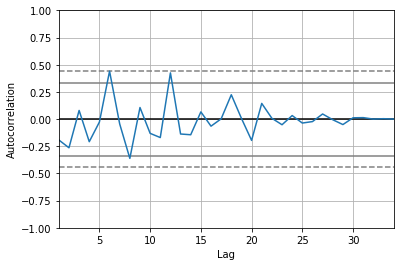

In [47]:
autocorrelation_plot(residuals);

### ARIMA modelling

In [48]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

/opt/conda/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [49]:
decomp = seasonal_decompose(total_item_sales.values, freq=12, model='additive')

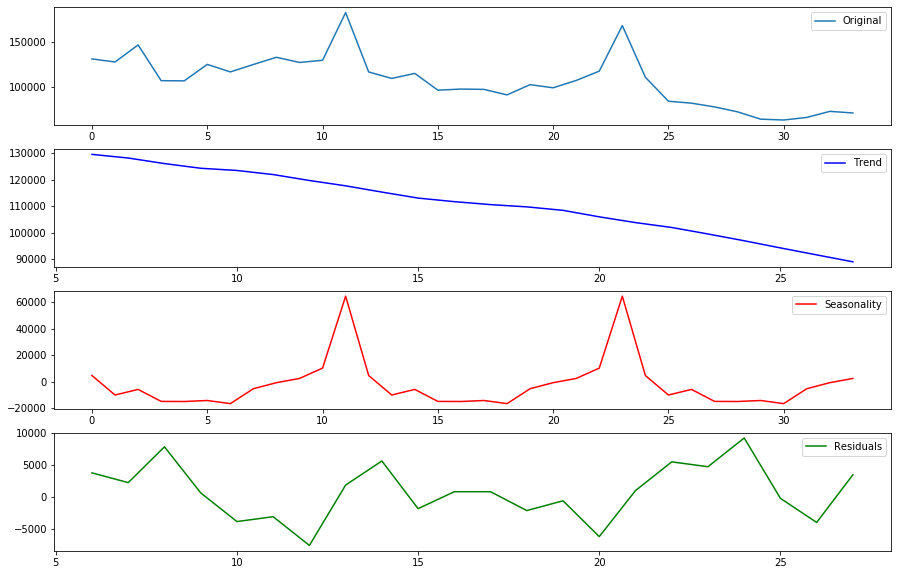

In [50]:
fig, axes = plt.subplots(4, 1)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0].plot(total_item_sales, label=f'Original')
axes[0].legend()
axes[1].plot(decomp.trend, label=f'Trend',color="b")
axes[1].legend()
axes[2].plot(decomp.seasonal, label=f'Seasonality',color='r')
axes[2].legend()
axes[3].plot(decomp.resid, label=f'Residuals',color='g')
axes[3].legend();